In [144]:
import glob, os
import pandas as pd
from matplotlib import pyplot as plt

In [145]:
# Read all CSVs into a single dataframe

df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "result_data/*.csv"))))
df

,image,grid_width,block_width,start,goal,cpu_runtime,gpu_runtime,cpu_path_length,gpu_path_length,cpu_path_exists,gpu_path_exists
0,dataset/select-maps/simplest/orz704d.png,32,16,518,445,0.001048,0.013133,24,24,True,True
1,dataset/select-maps/simplest/arena.png,32,16,661,5,0.000849,0.011525,21,21,True,True
2,dataset/select-maps/simplest/orz704d.png,32,16,513,446,0.000963,0.012752,30,30,True,True
3,dataset/select-maps/simplest/arena.png,32,16,715,125,0.000900,0.012596,24,24,True,True
4,dataset/select-maps/simplest/combat2.png,32,16,1016,132,0.000966,0.010803,28,28,True,True
...,...,...,...,...,...,...,...,...,...,...,...
95,dataset/select-maps/simplest/combat.png,128,16,1170,4075,0.022684,0.026789,90,90,True,True
96,dataset/select-maps/simplest/lak307d.png,128,16,4709,9478,0.021180,0.026318,96,96,True,True
97,dataset/select-maps/simplest/ost004d.png,128,16,14112,2891,0.014542,0.020959,94,94,True,True
98,dataset/select-maps/simplest/arena.png,128,16,14147,831,0.015055,0.028489,105,105,True,True


In [146]:
# Separate dataframe into new dataframes based on planning block size

blocks4 = df[df.block_width == 4]
blocks8 = df[df.block_width == 8]
blocks16 = df[df.block_width == 16]

In [147]:
# Get average runtime for all images where gpu path exists

ave4 = blocks4[blocks4.gpu_path_exists == True].groupby('grid_width', as_index=False)[['cpu_runtime', 'gpu_runtime']].mean()
ave8 = blocks8[blocks8.gpu_path_exists == True].groupby('grid_width', as_index=False)[['cpu_runtime', 'gpu_runtime']].mean()
ave16 = blocks16[blocks16.gpu_path_exists == True].groupby('grid_width', as_index=False)[['cpu_runtime', 'gpu_runtime']].mean()

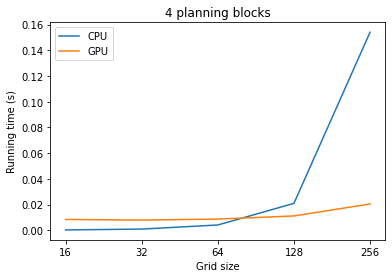

In [148]:
plt.plot(ave4.grid_width.head().astype('str'), ave4.head().cpu_runtime)
plt.plot(ave4.grid_width.head().astype('str'), ave4.head().gpu_runtime)
plt.title('4 planning blocks')
plt.xlabel('Grid size')
plt.ylabel('Running time (s)')
plt.legend(['CPU', 'GPU'])
plt.show()

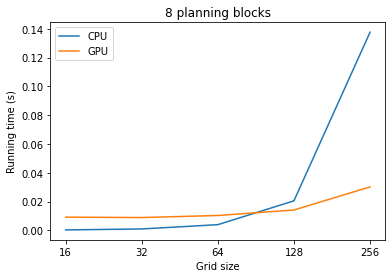

In [149]:
plt.plot(ave8.grid_width.head().astype('str'), ave8.head().cpu_runtime)
plt.plot(ave8.grid_width.head().astype('str'), ave8.head().gpu_runtime)
plt.title('8 planning blocks')
plt.xlabel('Grid size')
plt.ylabel('Running time (s)')
plt.legend(['CPU', 'GPU'])
plt.show()

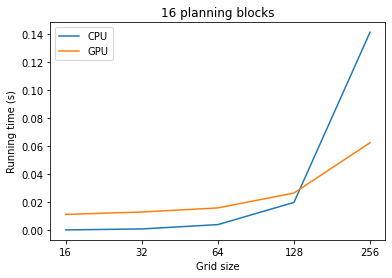

In [150]:
plt.plot(ave16.grid_width.head().astype('str'), ave16.head().cpu_runtime)
plt.plot(ave16.grid_width.head().astype('str'), ave16.head().gpu_runtime)
plt.title('16 planning blocks')
plt.xlabel('Grid size')
plt.ylabel('Running time (s)')
plt.legend(['CPU', 'GPU'])
plt.show()

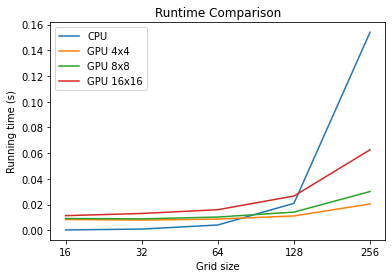

In [180]:
plt.plot(ave4.grid_width.head().astype('str'), ave4.head().cpu_runtime)
plt.plot(ave4.grid_width.head().astype('str'), ave4.head().gpu_runtime)
plt.plot(ave8.grid_width.head().astype('str'), ave8.head().gpu_runtime)
plt.plot(ave16.grid_width.head().astype('str'), ave16.head().gpu_runtime)

plt.title('Runtime Comparison')
plt.xlabel('Grid size')
plt.ylabel('Running time (s)')
plt.legend(['CPU', 'GPU 4x4', 'GPU 8x8', 'GPU 16x16'])
plt.show()

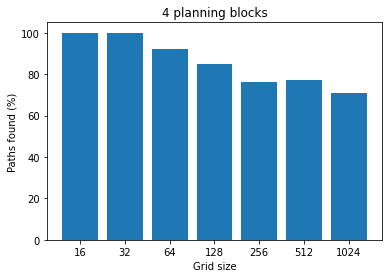

In [151]:
# Get percentage of successful GPU runs

success4 = blocks4.groupby('grid_width', as_index=False)[['gpu_path_exists']].sum()
success8 = blocks8.groupby('grid_width', as_index=False)[['gpu_path_exists']].sum()
success16 = blocks16.groupby('grid_width', as_index=False)[['gpu_path_exists']].sum()

plt.bar(success4.grid_width.astype('str'), success4.gpu_path_exists)
plt.title('4 planning blocks')
plt.xlabel('Grid size')
plt.ylabel('Paths found (%)')
plt.show()

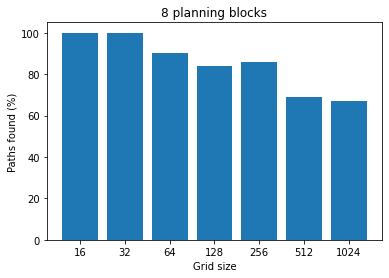

In [152]:
plt.bar(success8.grid_width.astype('str'), success8.gpu_path_exists)
plt.title('8 planning blocks')
plt.xlabel('Grid size')
plt.ylabel('Paths found (%)')
plt.show()

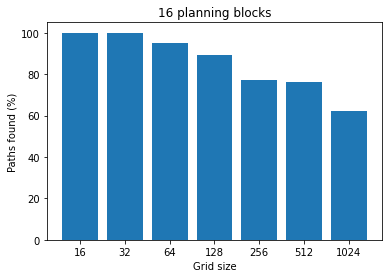

In [153]:
plt.bar(success16.grid_width.astype('str'), success16.gpu_path_exists)
plt.title('16 planning blocks')
plt.xlabel('Grid size')
plt.ylabel('Paths found (%)')
plt.show()

In [167]:
combined = pd.merge(success4, success8, on='grid_width', how='outer', suffixes=('_4', '_8'))
combined

,grid_width,gpu_path_exists_4,gpu_path_exists_8
0,16,100,100
1,32,100,100
2,64,92,90
3,128,85,84
4,256,76,86
5,512,77,69
6,1024,71,67


In [168]:
combined2 = pd.merge(combined, success16, on='grid_width', how='outer', suffixes=('_8', '_16'))
combined2

,grid_width,gpu_path_exists_4,gpu_path_exists_8,gpu_path_exists
0,16,100,100,100
1,32,100,100,100
2,64,92,90,95
3,128,85,84,89
4,256,76,86,77
5,512,77,69,76
6,1024,71,67,62


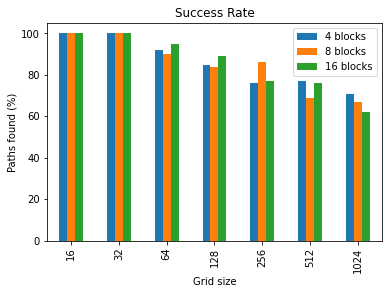

In [181]:
combined2.plot(x="grid_width", y=["gpu_path_exists_4", "gpu_path_exists_8", "gpu_path_exists"], kind="bar")

plt.title('Success Rate')
plt.xlabel('Grid size')
plt.ylabel('Paths found (%)')
plt.legend(['4 blocks', '8 blocks', '16 blocks'])
plt.show()

In [187]:
# Get path length averages for cpu and gpu

length4 = blocks4.groupby('grid_width', as_index=False)[['cpu_path_length', 'gpu_path_length']].mean().round(0)
# success8 = blocks8.groupby('grid_width', as_index=False)[['gpu_path_exists']].sum()
# success16 = blocks16.groupby('grid_width', as_index=False)[['gpu_path_exists']].sum()
length4

,grid_width,cpu_path_length,gpu_path_length
0,16,13.0,13.0
1,32,24.0,24.0
2,64,47.0,44.0
3,128,95.0,81.0
4,256,187.0,142.0
5,512,377.0,296.0
6,1024,767.0,537.0
